In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
data=files.upload()

Saving aviation_data.csv to aviation_data (4).csv


In [3]:
df_flight=pd.read_csv('aviation_data.csv')

In [4]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FlightNumber   12 non-null     object 
 1   DepartureDate  12 non-null     object 
 2   DepartureTime  12 non-null     object 
 3   ArrivalDate    12 non-null     object 
 4   ArrivalTime    12 non-null     object 
 5   Airline        12 non-null     object 
 6   DelayMinutes   10 non-null     float64
dtypes: float64(1), object(6)
memory usage: 800.0+ bytes


In [5]:
df_flight.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09-01-2023,8:30 AM,09-01-2023,10:45 AM,American Airlines,15.0
1,DL5678,09-01-2023,1:15 PM,09-01-2023,3:30 PM,Delta,5.0
2,UA9101,09-01-2023,5:00 PM,09-01-2023,7:15 PM,United Airlines,25.0
3,AA1234,09-01-2023,8:30 AM,09-01-2023,10:45 PM,American Airlines,30.0
4,DL5678,09-02-2023,2:00 PM,09-02-2023,4:10 PM,Delta,NaN


In [6]:
#1)For cleaning the data
#Firstly here I am checking the original format to make the viewer understand
from datetime import datetime
print(df_flight[['DepartureDate', 'ArrivalDate']].head())

  DepartureDate ArrivalDate
0    09-01-2023  09-01-2023
1    09-01-2023  09-01-2023
2    09-01-2023  09-01-2023
3    09-01-2023  09-01-2023
4    09-02-2023  09-02-2023


In [7]:
#2) Now converting departure date and arrival Date into proper asked date format
# Converting DepartureDate and ArrivalDate columns to datetime with appropriate format
df_flight['DepartureDate'] = pd.to_datetime(df_flight['DepartureDate'], format='%m-%d-%Y', errors='coerce')
df_flight['ArrivalDate'] = pd.to_datetime(df_flight['ArrivalDate'], format='%m-%d-%Y', errors='coerce')

# Display the transformed columns
print(df_flight[['DepartureDate', 'ArrivalDate']].head())


  DepartureDate ArrivalDate
0    2023-09-01  2023-09-01
1    2023-09-01  2023-09-01
2    2023-09-01  2023-09-01
3    2023-09-01  2023-09-01
4    2023-09-02  2023-09-02


In [8]:
# 3)Now converting Departure time  and Arrival Time into 24 hour format
# Firstly trying parse time as a 12-hour AM/PM format, if it fails, then it'll use 24-hour format
def parse_time(time_str):
    try:
        return pd.to_datetime(time_str, format='%I:%M %p').time()  # 12-hour format with AM/PM
    except ValueError:
        return pd.to_datetime(time_str, format='%H:%M:%S').time()  # 24-hour format

df_flight['DepartureTime'] = df_flight['DepartureTime'].apply(parse_time)
df_flight['ArrivalTime'] = df_flight['ArrivalTime'].apply(parse_time)

df_flight[['DepartureTime', 'ArrivalTime']].head()

,DepartureTime,ArrivalTime
0,08:30:00,10:45:00
1,13:15:00,15:30:00
2,17:00:00,19:15:00
3,08:30:00,22:45:00
4,14:00:00,16:10:00


In [9]:
# 4)Now Iam handling the NAN values in the DelayMinutes collumn from the dataset.
df_flight['DelayMinutes'].fillna(df_flight['DelayMinutes'].median(),inplace=True)
df_flight['DelayMinutes']

,DelayMinutes
0,15.0
1,5.0
2,25.0
3,30.0
4,22.5
5,20.0
6,60.0
7,10.0
8,22.5
9,15.0


In [10]:
# In this I am checking the flight number and departure date as onle flight is flying on more than multiple days so it wont be considered in duplicates.
unique_flight_dates = df_flight[['FlightNumber', 'DepartureDate']].drop_duplicates()

print(f'Total number of unique: {unique_flight_dates}')


Total number of unique:    FlightNumber DepartureDate
0        AA1234    2023-09-01
1        DL5678    2023-09-01
2        UA9101    2023-09-01
4        DL5678    2023-09-02
5        UA9101    2023-09-02
6        AA1234    2023-09-02
7        DL5678    2023-09-03
8        UA9101    2023-09-03
9        AA1234    2023-09-03
10       DL5678    2023-09-04
11       UA9101    2023-09-04


In [11]:
#So in order to handle the duplicate entries,I am here dropping the duplicate values.
# Dropping duplicates based on both FlightNumber and DepartureDate beacuse same flight is flying on more the 2 days
df_unique_flights = df_flight.drop_duplicates(subset=['FlightNumber', 'DepartureDate'])

print(f'Total number of unique entries: {len(df_unique_flights)}')
print(df_unique_flights)


Total number of unique entries: 11
   FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0        AA1234    2023-09-01      08:30:00  2023-09-01    10:45:00   
1        DL5678    2023-09-01      13:15:00  2023-09-01    15:30:00   
2        UA9101    2023-09-01      17:00:00  2023-09-01    19:15:00   
4        DL5678    2023-09-02      14:00:00  2023-09-02    16:10:00   
5        UA9101    2023-09-02      17:00:00  2023-09-02    19:15:00   
6        AA1234    2023-09-02      20:30:00  2023-09-03    10:45:00   
7        DL5678    2023-09-03      13:00:00  2023-09-03    15:30:00   
8        UA9101    2023-09-03      15:00:00  2023-09-03    17:20:00   
9        AA1234    2023-09-03      08:30:00  2023-09-03    10:00:00   
10       DL5678    2023-09-04      12:30:00  2023-09-04    14:40:00   
11       UA9101    2023-09-04      19:00:00  2023-09-04    21:15:00   

              Airline  DelayMinutes  
0   American Airlines          15.0  
1               Delta           5.0 

In [12]:
df_unique_flights

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,22.5
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,22.5
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0
10,DL5678,2023-09-04,12:30:00,2023-09-04,14:40:00,Delta,25.0


In [14]:
#6)In this I am combining the Departure/Arrival date and Departure/Arrival time to make a new resulting collumn

df_unique_flights['DepartureDateTime'] = pd.to_datetime(df_unique_flights['DepartureDate'].astype(str) + ' ' + df_unique_flights['DepartureTime'].astype(str))
df_unique_flights['ArrivalDateTime'] = pd.to_datetime(df_unique_flights['ArrivalDate'].astype(str) + ' ' + df_unique_flights['ArrivalTime'].astype(str))

# Display the updated DataFrame
print(df_unique_flights[['FlightNumber', 'DepartureDateTime', 'ArrivalDateTime']])


   FlightNumber   DepartureDateTime     ArrivalDateTime
0        AA1234 2023-09-01 08:30:00 2023-09-01 10:45:00
1        DL5678 2023-09-01 13:15:00 2023-09-01 15:30:00
2        UA9101 2023-09-01 17:00:00 2023-09-01 19:15:00
4        DL5678 2023-09-02 14:00:00 2023-09-02 16:10:00
5        UA9101 2023-09-02 17:00:00 2023-09-02 19:15:00
6        AA1234 2023-09-02 20:30:00 2023-09-03 10:45:00
7        DL5678 2023-09-03 13:00:00 2023-09-03 15:30:00
8        UA9101 2023-09-03 15:00:00 2023-09-03 17:20:00
9        AA1234 2023-09-03 08:30:00 2023-09-03 10:00:00
10       DL5678 2023-09-04 12:30:00 2023-09-04 14:40:00
11       UA9101 2023-09-04 19:00:00 2023-09-04 21:15:00


<ipython-input-14-6271bf4bd45c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_flights['DepartureDateTime'] = pd.to_datetime(df_unique_flights['DepartureDate'].astype(str) + ' ' + df_unique_flights['DepartureTime'].astype(str))
<ipython-input-14-6271bf4bd45c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_flights['ArrivalDateTime'] = pd.to_datetime(df_unique_flights['ArrivalDate'].astype(str) + ' ' + df_unique_flights['ArrivalTime'].astype(str))


In [18]:
#it contains all the collumns except Departure/Arrivale Date/Time(just for in case needed)
new_df_flights=df_unique_flights.drop(['DepartureDate', 'DepartureTime', 'ArrivalDate', 'ArrivalTime'], axis=1)

In [19]:
new_df_flights

,FlightNumber,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime
0,AA1234,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00
1,DL5678,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00
2,UA9101,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00
4,DL5678,Delta,22.5,2023-09-02 14:00:00,2023-09-02 16:10:00
5,UA9101,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00
6,AA1234,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00
7,DL5678,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00
8,UA9101,United Airlines,22.5,2023-09-03 15:00:00,2023-09-03 17:20:00
9,AA1234,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00
10,DL5678,Delta,25.0,2023-09-04 12:30:00,2023-09-04 14:40:00


In [21]:
bool_mask=new_df_flights['ArrivalDateTime'] < new_df_flights['DepartureDateTime']
new_df_flights.loc[bool_mask,'ArrivalDateTime'] += pd.Timedelta(days=1)
print(new_df_flights[['FlightNumber', 'DepartureDateTime', 'ArrivalDateTime']])

   FlightNumber   DepartureDateTime     ArrivalDateTime
0        AA1234 2023-09-01 08:30:00 2023-09-01 10:45:00
1        DL5678 2023-09-01 13:15:00 2023-09-01 15:30:00
2        UA9101 2023-09-01 17:00:00 2023-09-01 19:15:00
4        DL5678 2023-09-02 14:00:00 2023-09-02 16:10:00
5        UA9101 2023-09-02 17:00:00 2023-09-02 19:15:00
6        AA1234 2023-09-02 20:30:00 2023-09-03 10:45:00
7        DL5678 2023-09-03 13:00:00 2023-09-03 15:30:00
8        UA9101 2023-09-03 15:00:00 2023-09-03 17:20:00
9        AA1234 2023-09-03 08:30:00 2023-09-03 10:00:00
10       DL5678 2023-09-04 12:30:00 2023-09-04 14:40:00
11       UA9101 2023-09-04 19:00:00 2023-09-04 21:15:00


In [22]:
new_df_flights

,FlightNumber,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime
0,AA1234,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00
1,DL5678,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00
2,UA9101,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00
4,DL5678,Delta,22.5,2023-09-02 14:00:00,2023-09-02 16:10:00
5,UA9101,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00
6,AA1234,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00
7,DL5678,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00
8,UA9101,United Airlines,22.5,2023-09-03 15:00:00,2023-09-03 17:20:00
9,AA1234,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00
10,DL5678,Delta,25.0,2023-09-04 12:30:00,2023-09-04 14:40:00


In [24]:
#7)Creating a new column for FlightDuration by calculating the difference between DepartureTime and
#ArrivalTime on the same day
new_df_flights['FlightDuration']=new_df_flights['ArrivalDateTime'] - new_df_flights['DepartureDateTime']
new_df_flights

,FlightNumber,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime,FlightDuration
0,AA1234,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00,0 days 02:15:00
1,DL5678,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00,0 days 02:15:00
2,UA9101,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00,0 days 02:15:00
4,DL5678,Delta,22.5,2023-09-02 14:00:00,2023-09-02 16:10:00,0 days 02:10:00
5,UA9101,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00,0 days 02:15:00
6,AA1234,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00,0 days 14:15:00
7,DL5678,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00,0 days 02:30:00
8,UA9101,United Airlines,22.5,2023-09-03 15:00:00,2023-09-03 17:20:00,0 days 02:20:00
9,AA1234,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00,0 days 01:30:00
10,DL5678,Delta,25.0,2023-09-04 12:30:00,2023-09-04 14:40:00,0 days 02:10:00


In [25]:
#8)
#a.Analyze the distribution of delays and identify any trends or patterns
print(new_df_flights['DelayMinutes'].describe())

count    11.000000
mean     24.090909
std      15.742964
min       5.000000
25%      15.000000
50%      22.500000
75%      25.000000
max      60.000000
Name: DelayMinutes, dtype: float64


Text(0, 0.5, 'Delay (minutes)')

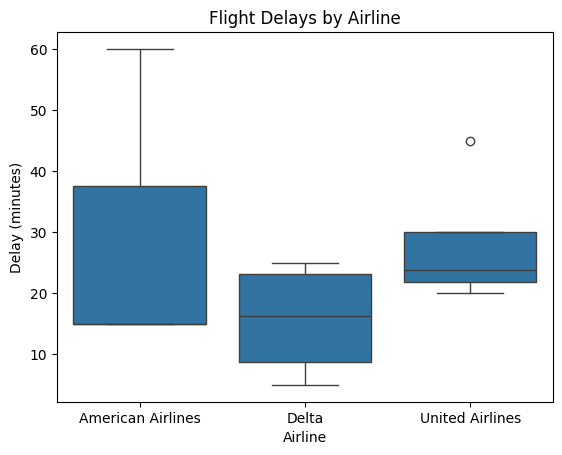

In [26]:
plt.subplot(1, 1, 1)
sns.boxplot(x='Airline', y='DelayMinutes', data=new_df_flights)
plt.title('Flight Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay (minutes)')

In [27]:
#b. Calculate the average delay for each airline.
new_df_flights.groupby('Airline')['DelayMinutes'].mean()

,DelayMinutes
Airline,
American Airlines,30.000
Delta,15.625
United Airlines,28.125


In [28]:
import matplotlib.pyplot as plt
new_df_flights['DepartureHour'] = pd.to_datetime(new_df_flights['DepartureDateTime'])

# Grouping by departure hour to calculate average delay
delay_analysis = new_df_flights.groupby('DepartureHour')['DelayMinutes'].mean().reset_index()

print(delay_analysis)

         DepartureHour  DelayMinutes
0  2023-09-01 08:30:00          15.0
1  2023-09-01 13:15:00           5.0
2  2023-09-01 17:00:00          25.0
3  2023-09-02 14:00:00          22.5
4  2023-09-02 17:00:00          20.0
5  2023-09-02 20:30:00          60.0
6  2023-09-03 08:30:00          15.0
7  2023-09-03 13:00:00          10.0
8  2023-09-03 15:00:00          22.5
9  2023-09-04 12:30:00          25.0
10 2023-09-04 19:00:00          45.0


Conclusion:Hence It says that the flight which departing late ie. 8:30 PM or 7:00 PM is delaying and it can also be said that acooring to this data the flight which is departing after 6:00 PM is likely to be dealyed much in time.

<ipython-input-29-22f7600a0a53>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='DelayMinutes', data=average_delay, palette='viridis')


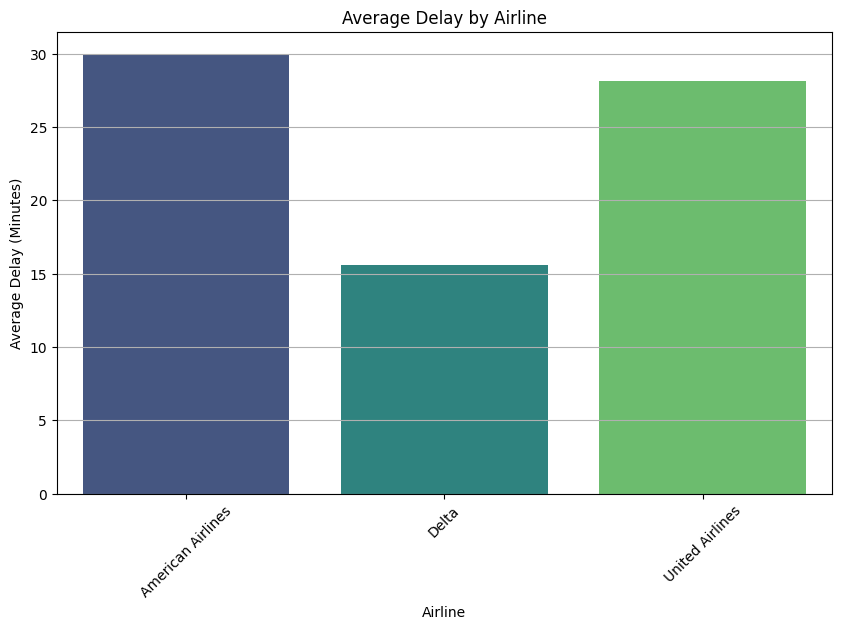

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average delay by airline
average_delay = new_df_flights.groupby('Airline')['DelayMinutes'].mean().reset_index()

# Bar chart for average delay by airline
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='DelayMinutes', data=average_delay, palette='viridis')
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [30]:
new_df_flights.to_csv('cleaned_aviation_dataaa.csv', index=False)
files.download('cleaned_aviation_dataaa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>